<h1> Hyperparameter Optimization: A Brief Introduction </h1>

Edesio Alcobaça (edesio@usp.br)<br>
Outras redes: <a href="https://github.com/ealcobaca">GitHub</a> -- <a href="https://www.linkedin.com/in/edesio-alcoba%C3%A7a-344491141/">LinkedIn</a>


MBA em Ciência de Dados <br>
Universidade de São Paulo, São Carlos, Brasil<br>
Copyright (c) 2021

<h2> 1) Intuitive Notion </h2>

<img src="img/motivacao.png" width="800">

<h3> Optimization Problem </h3>

Let the vector $\textbf{x} = (x_1,\dotsc, x_n)$ be the <i>optimization variable</i> of the problem, let the function $f : \mathbb{R}^n \to \mathbb{R}$ be the <i>objective function </i>, let the functions $g_i : \mathbb{R}^n \to \mathbb{R},~i=1,\dotsc,m$ be the <i>constraint function<i> (or inequality) and the constants $b_1,\dotsc, b_m$ be the limits (or bounds) for the constraints. An optimization problem can be defined as follows:
<br><br>
 
<center> minimize </center>
$$
f(\textbf{x})
$$
<br>  
<center> subject to </center>
$$
g_i(\textbf{x}) \leq b_i, \qquad i=1,\dotsc, m.
$$
    
The vector $\textbf{x}^*$ which obtains the minimum value for $f$ and satisfy the constraints is called optimal. Note that $\text{minimize}$ $f(\textbf{x})$ is equivalent to $\text{maximize}$ $-f(\textbf{x})$.

<h3> Hyperparameter Optimization Problem </h3>

Let $\mathcal{D}^\text{train} \subset D$ be the training subset of the dataset $\mathcal{D}$ and $\alpha \in A$ be a machine learning algorithm where $\lambda \in \Lambda$ is the hyperparameter configuration belonging to the space of all possible settings $\Lambda$. The algorithm $\alpha$ produces an hypothesis function $h \in \mathcal{H}$ which approximates the real function $f$. Given a function $\mathcal{E}$ that computes the error of $h$ when estimating $f$, where $h = \alpha(\mathcal{D}^\text{train}, \lambda)$, the optimal hyperparameter setting satisfies the following equation:

\begin{equation}
\lambda^{*} = \text{argmin}_{\lambda \in \Lambda}~ \mathcal{E}(\alpha(d_\text{train}, \lambda), f)
\end{equation}

The $\lambda^{*}$ is the element in $\Lambda$ which results in a minimal error. However, it is not possible to calculate $\lambda^{*}$ because we do not know $f$, which is required to calculate $\mathcal{E}$. Thus, we should somehow estimate $\mathcal{E}$ using $\mathcal{D}^\text{train}$. An alternative can be by a cross-validation or holdout procedure.

<h2> 2) Random Search and Grid Search </h2>

Grid Search (GS) and Random Search (RS), also known as model-free optimization or exhaustive searching, are simple methods used in AutoML. They consist of sampling a large population from a compact set $\mathcal{A}$ (hyperspace of possible pipelines), running the objective function $f(\textbf{x}) \mid \textbf{x} \in \mathcal{A}$ for each population member, and returning the best configuration found.

<img src="img/grid_search.png" width="600">

<img src="img/random_search.png" width="600">

<img src="img/rs_grid_diff_plot.png" width="800">

<h3> Pros and Cons </h3>
Drawbacks and advantages of GS and RS: 

Pros:
* RS and GS are naturally parallelizable;
* It is not necessary to express the objective function mathematically;
* RS has performed better than GS when some hyperparameters are much more important than others;
* In RS, it is straightforward adding new examples to be optimized;
* RS makes no assumptions on the $f$ being optimized, and given enough resources, will, in expectation, achieves performance arbitrarily close to the optimum.

Cons:
* Both methods need a lot of computational time;
* It is not straightforward to add new points in the grid to be optimized. It requires adding other points to complete the grid. We can say that GS suffers from the curse of dimensionality;
* The minimum or maximum cannot be found due to the grid resolution of GS.

<img src="img/rs_grid_diff.png" width="800">

<h2> 3) Hands-on </h2>

Vamos otimizar os parâmetros do Random Forest (RF), Decision Tree (DT) e k-Nearest Neighbor (kNN) para o conjunto de dados de digitos.

Vamos ler o conjunto de dados:

In [1]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits['data']
y = digits['target']

X.shape

(1797, 64)

O conjunto de dados é uma matriz 8x8 de pixels. Portanto, são 64 atributos onde cada um representam a intensidade cor (escala de cinza):

0
7


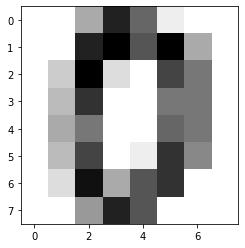

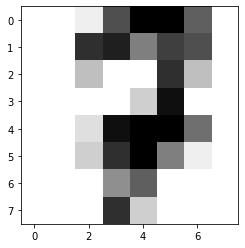

In [2]:
import numpy as np
import matplotlib.pyplot as plt

image0 = np.reshape(X[0, :], (8, 8))
image7 = np.reshape(X[300, :], (8, 8))
print(y[0])
print(y[300])
plt.imshow(image0, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()
plt.imshow(image7, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Vamos dividir o conjunto de dados em treino (80%) e teste(20%):

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Vamos otimizar a DT:

Para aplicarmos o RS, podemos usar a classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html">RandomizedSearchCV</a> do scikit-learn:

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint, genexpon
from sklearn.metrics import classification_report


dt = DecisionTreeClassifier()

# definimos uma distribuição para cada hiperparâmetro
distributions = {
    "criterion": ['gini', 'entropy'],
    "max_depth" : randint(low=1, high=6),
    "min_samples_leaf": uniform(loc=0.001, scale=0.005),
    "class_weight": ["balanced", None],
    "random_state": [42]
}

# execução do RandomSearch
clf = RandomizedSearchCV(
    estimator = dt, # algoritmo de AM que queremos ajustar
    param_distributions = distributions, # distribuição dos hiperparâmetros
    n_iter = 50, # Número de hiperparâmetros selecionados
    scoring = "f1_macro", # performance utilizada na cross-validação
    n_jobs = 4, # número de core em paralelo
    cv = 10, # tipo de cross-validação, no nosso caso 10-fold
#     verbose = 2,
    random_state = 42
)

search = clf.fit(X_train, y_train) # após o fit, clf é o melhor modelo treinado com todo conjunto de treino
result_dt = search.cv_results_ # retorna todos os dados do experimento (performances, hiperparâmetros e etc)
search.best_params_ # Retorna o melhor hiperparâmetro encontrado

print(search.best_params_)

y_pred = clf.predict(X_test)
print('\n clasification report:\n', classification_report(y_test, y_pred, digits=3))

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 0.0017046211248738132, 'random_state': 42}

 clasification report:
               precision    recall  f1-score   support

           0      0.968     0.909     0.937        33
           1      0.533     0.857     0.658        28
           2      0.889     0.485     0.627        33
           3      0.897     0.765     0.825        34
           4      0.719     0.891     0.796        46
           5      0.917     0.936     0.926        47
           6      1.000     0.914     0.955        35
           7      0.774     0.706     0.738        34
           8      0.649     0.800     0.716        30
           9      0.969     0.775     0.861        40

    accuracy                          0.811       360
   macro avg      0.831     0.804     0.804       360
weighted avg      0.840     0.811     0.813       360



In [5]:
from sklearn.metrics import classification_report

# após o fit, clf é o melhor modelo treinado com todo conjunto de treino
# contudo, você pode criar um novo modelo assim:
dt = DecisionTreeClassifier(**search.best_params_)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

y_pred = clf.predict(X_test)
print('\n clasification report:\n', classification_report(y_test, y_pred, digits=3))


 clasification report:
               precision    recall  f1-score   support

           0      0.968     0.909     0.937        33
           1      0.533     0.857     0.658        28
           2      0.889     0.485     0.627        33
           3      0.897     0.765     0.825        34
           4      0.719     0.891     0.796        46
           5      0.917     0.936     0.926        47
           6      1.000     0.914     0.955        35
           7      0.774     0.706     0.738        34
           8      0.649     0.800     0.716        30
           9      0.969     0.775     0.861        40

    accuracy                          0.811       360
   macro avg      0.831     0.804     0.804       360
weighted avg      0.840     0.811     0.813       360



Vamos otimizar a kNN:

Para aplicarmos o RS, podemos usar a classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html">RandomizedSearchCV</a> do scikit-learn:

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

knn = KNeighborsClassifier()
distributions = {
    "n_neighbors": randint(low=2, high=20),
    #"weights": ["uniform", "distance"],
    "p": uniform(loc=1, scale=2),
    "metric": ["minkowski"]
}

clf = RandomizedSearchCV(
    estimator = knn, # algoritmo de AM que queremos ajustar
    param_distributions = distributions, # distribuição dos hiperparâmetros
    n_iter = 50, # Número de hiperparâmetros selecionados
    scoring = "f1_macro", # performance utilizada na cross-validação
    n_jobs = 4, # número de core em paralelo
    cv = 10, # tipo de cross-validação, no nosso caso 10-fold
#    verbose = 2,
    random_state = 42
)

search = clf.fit(X_train, y_train)

result_knn = search.cv_results_
search.best_params_

{'metric': 'minkowski', 'n_neighbors': 3, 'p': 2.3684660530243136}

In [7]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(**search.best_params_)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


y_pred = clf.predict(X_test)
print('\n clasification report:\n', classification_report(y_test, y_pred, digits=3))


 clasification report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        33
           1      0.966     1.000     0.982        28
           2      1.000     1.000     1.000        33
           3      0.971     1.000     0.986        34
           4      0.979     1.000     0.989        46
           5      0.979     0.979     0.979        47
           6      0.972     1.000     0.986        35
           7      1.000     0.971     0.985        34
           8      1.000     0.967     0.983        30
           9      0.974     0.925     0.949        40

    accuracy                          0.983       360
   macro avg      0.984     0.984     0.984       360
weighted avg      0.983     0.983     0.983       360



In [8]:
result_knn

{'mean_fit_time': array([0.00089843, 0.00073183, 0.00077221, 0.00075889, 0.00077884,
        0.0008131 , 0.00076892, 0.00083556, 0.00094883, 0.00077405,
        0.00082834, 0.00086367, 0.00090983, 0.00094686, 0.00076244,
        0.0008126 , 0.00126936, 0.00083215, 0.00070226, 0.00069489,
        0.00070326, 0.00083988, 0.00074294, 0.00080531, 0.00074601,
        0.00243261, 0.00078895, 0.00070312, 0.00110011, 0.00082512,
        0.00083241, 0.00087411, 0.00079947, 0.00095732, 0.00092413,
        0.00097411, 0.00079877, 0.00076721, 0.00077467, 0.00076876,
        0.00079291, 0.00079336, 0.00080812, 0.00088212, 0.00112529,
        0.00101807, 0.00084565, 0.00083919, 0.00085239, 0.0008244 ]),
 'std_fit_time': array([2.26600374e-04, 8.67309806e-05, 9.76754363e-05, 7.65259018e-05,
        6.44560605e-05, 7.59437990e-05, 5.80441721e-05, 1.51528398e-04,
        2.84152321e-04, 8.57391929e-05, 1.44035689e-04, 2.08181862e-04,
        2.89758770e-04, 3.40695615e-04, 8.31900095e-05, 2.03112594e-0

Vamos otimizar a RF:

Para aplicarmos o RS, podemos usar a classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html">RandomizedSearchCV</a> do scikit-learn:

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

rf = RandomForestClassifier()
distributions = {
    "n_estimators": randint(low=10, high=300),
    "criterion": ['gini', 'entropy'],
    "max_features": ["sqrt", "sqrt", "log2"],
    #"class_weight": ["balanced", None],
    "random_state": [42]
}


clf = RandomizedSearchCV(
    estimator = rf, # algoritmo de AM que queremos ajustar
    param_distributions = distributions, # distribuição dos hiperparâmetros
    n_iter = 50, # Número de hiperparâmetros selecionados
    scoring = "f1_macro", # performance utilizada na cross-validação
    n_jobs = 4, # número de core em paralelo
    cv = 10, # tipo de cross-validação, no nosso caso 10-fold
#    verbose = 2,
    random_state = 42
)

search = clf.fit(X_train, y_train)
result_rf = search.cv_results_
search.best_params_

{'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 270,
 'random_state': 42}

In [10]:
from sklearn.metrics import classification_report

rf = RandomForestClassifier(**search.best_params_)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


y_pred = clf.predict(X_test)
print('\n clasification report:\n', classification_report(y_test, y_pred, digits=3))


 clasification report:
               precision    recall  f1-score   support

           0      1.000     0.970     0.985        33
           1      0.933     1.000     0.966        28
           2      1.000     1.000     1.000        33
           3      1.000     0.941     0.970        34
           4      0.979     1.000     0.989        46
           5      0.939     0.979     0.958        47
           6      0.971     0.971     0.971        35
           7      0.971     0.971     0.971        34
           8      0.966     0.933     0.949        30
           9      0.974     0.950     0.962        40

    accuracy                          0.972       360
   macro avg      0.973     0.971     0.972       360
weighted avg      0.973     0.972     0.972       360



Plot da performance dos classificadores:

<AxesSubplot:>

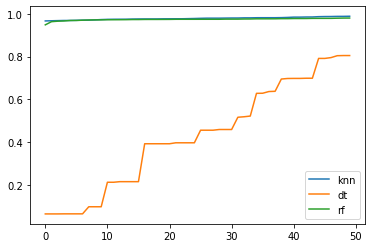

In [11]:
import pandas as pd
import seaborn as sns


idx = []
perfs = [] 
alg = []
n_iter = 50


for alg_name, result in [('knn', result_knn), ('dt', result_dt), ('rf', result_rf)]:
    idx += np.arange(0, n_iter).tolist()
    perfs += result["mean_test_score"][np.argsort(result["rank_test_score"])[::-1]].tolist()
    alg += n_iter*[alg_name]


sns.lineplot(x=idx, y=perfs, hue=alg)

Plot da performance dos classificadores (apenas RF e kNN):

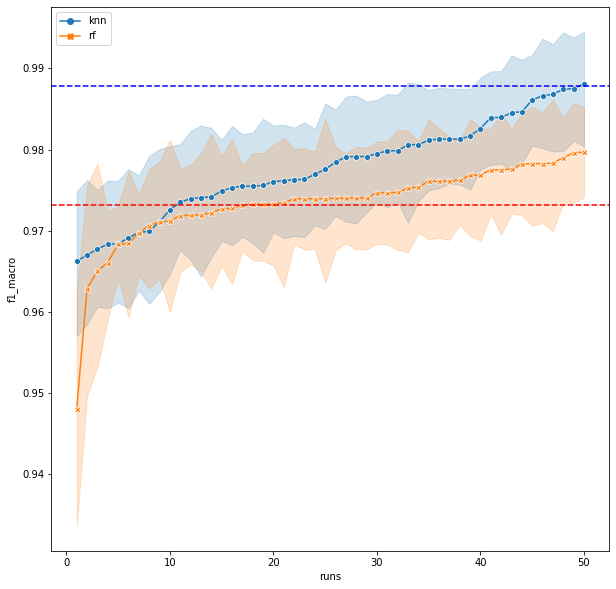

In [12]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

rf_deafult = RandomForestClassifier(random_state=42)
rf_deafult.fit(X_train, y_train)
y_pred = rf_deafult.predict(X_test)
f1_rf_default = f1_score(y_test, y_pred, average="macro")

knn_deafult = KNeighborsClassifier()
knn_deafult.fit(X_train, y_train)
y_pred = knn_deafult.predict(X_test)
f1_knn_default = f1_score(y_test, y_pred, average="macro")

idx = []
perfs = [] 
alg = []
n_iter = 50

for alg_name, result in [('knn', result_knn), ('rf', result_rf)]:
    perf_matrix = np.array([result[f"split{i}_test_score"] for i in range(10)])
    worst_to_best_idx = np.argsort(result["rank_test_score"])[::-1]

    for i, j in enumerate(worst_to_best_idx):
        idx += 10*[i+1] 
        perfs += perf_matrix[:, j].tolist()
        alg += 10*[alg_name]

df = pd.DataFrame({"runs": idx, "f1_macro": perfs, "algorithm": alg})

plt.subplots(figsize=(10, 10))
g = sns.lineplot(data=df, x="runs", y="f1_macro", hue="algorithm", style="algorithm", markers=True, dashes=False)
g.legend(loc="upper left")
ax1 = g.axes

ax1.axhline(f1_rf_default, ls='--', color='red')
ax1.axhline(f1_knn_default, ls='--', color='blue')

Visualizando o número 6:

Digit (pred):  6
Digit: (test) 6


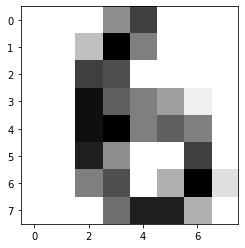

In [13]:
y_pred = knn.predict(X_test)
print("Digit (pred): ", y_pred[0])
print("Digit: (test)", y_test[0])

image_test = np.reshape(X_test[0, :], (8, 8))
plt.imshow(image_test, cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

<h2> References </h2>

* Hutter, Frank, Lars Kotthoff, and Joaquin Vanschoren. Automated machine learning: methods, systems, challenges. Springer Nature, 2019.


* Bergstra, James, et al. "Algorithms for hyper-parameter optimization." 25th annual conference on neural information processing systems (NIPS 2011). Vol. 24. Neural Information Processing Systems Foundation, 2011.


* Bergstra, James, and Yoshua Bengio. "Random search for hyper-parameter optimization." Journal of machine learning research 13.2 (2012).